In [1]:
%matplotlib inline
import numpy as np

In [2]:
import json
path = "data/usagov_bitly_data2013-05-17-1368832207.txt"
records = [json.loads(line) for line in open(path)]

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Los_Angeles',
 'gr': 'CA',
 'g': '15r91',
 'h': '10OBm3W',
 'l': 'pontifier',
 'al': 'en-US',
 'hh': 'j.mp',
 'r': 'direct',
 'u': 'http://www.nsa.gov/',
 't': 1368832205,
 'hc': 1365701422,
 'cy': 'Anaheim',
 'll': [33.816101, -117.979401]}

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/Los_Angeles',
 '',
 'America/Phoenix',
 'America/Chicago',
 '',
 'America/Indianapolis',
 'America/Chicago',
 '',
 'Australia/NSW',
 '']

In [5]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3839 non-null object
al             3444 non-null object
c              3208 non-null object
cy             3208 non-null object
g              3839 non-null object
gr             3208 non-null object
h              3839 non-null object
hc             3839 non-null float64
hh             3839 non-null object
kw             86 non-null object
l              3839 non-null object
ll             3204 non-null object
nk             3839 non-null float64
r              3839 non-null object
t              3839 non-null float64
tz             3839 non-null object
u              3839 non-null object
dtypes: float64(4), object(14)
memory usage: 556.8+ KB


In [6]:
frame['tz'][:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object

In [7]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York        903
America/Chicago         686
                        636
America/Los_Angeles     421
America/Puerto_Rico     184
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
America/Phoenix          40
Name: tz, dtype: int64

In [8]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York        903
America/Chicago         686
Unknown                 636
America/Los_Angeles     421
America/Puerto_Rico     184
Missing                 120
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
Name: tz, dtype: int64

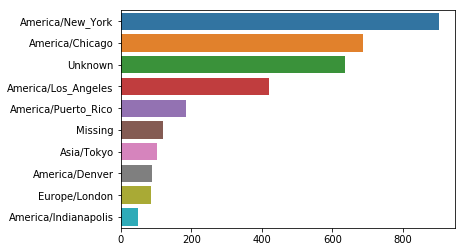

In [9]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [10]:
frame['a'][51]

'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329'

In [11]:
frame.a[51]

'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Mobile/10B329'

In [12]:
frame.a[51][:55]

'Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like Mac OS X)'

In [13]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts()[:10]

Mozilla/5.0           3251
Mozilla/4.0            322
CakePHP                 38
ShortLinkTranslate      36
TVersity                30
Opera/9.80              28
Dalvik/1.6.0            19
Xenu                    15
GoogleProducer;         13
feedzirra                8
dtype: int64

In [14]:
cframe = frame[frame.a.notnull()].copy()

In [15]:
os = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
os

array(['Not Windows', 'Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Not Windows'], dtype='<U11')

In [16]:
cframe['os'] = os
cframe['os'][:5]

0    Not Windows
1        Windows
2        Windows
3    Not Windows
4    Not Windows
Name: os, dtype: object

In [17]:
by_tz_os = cframe.groupby(['tz', 'os'])
by_tz_os.size()

tz                              os         
                                Not Windows    484
                                Windows        152
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Not Windows      4
                                Windows          2
Africa/Gaborone                 Windows          1
Africa/Johannesburg             Not Windows      2
America/Anchorage               Not Windows      5
                                Windows          3
America/Argentina/Buenos_Aires  Not Windows      4
                                Windows          7
America/Argentina/Catamarca     Not Windows      1
America/Argentina/Cordoba       Windows          2
America/Asuncion                Windows          1
America/Bogota                  Not Windows      8
                                Windows          8
America/Caracas                 Not Windows      8
                                Window

In [18]:
by_tz_os.size().unstack()

os,Not Windows,Windows
tz,,
,484.0,152.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,4.0,2.0
Africa/Gaborone,NaN,1.0
Africa/Johannesburg,2.0,NaN
America/Anchorage,5.0,3.0
America/Argentina/Buenos_Aires,4.0,7.0
America/Argentina/Catamarca,1.0,NaN


In [19]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,484.0,152.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,4.0,2.0
Africa/Gaborone,0.0,1.0
Africa/Johannesburg,2.0,0.0
America/Anchorage,5.0,3.0
America/Argentina/Buenos_Aires,4.0,7.0
America/Argentina/Catamarca,1.0,0.0


In [20]:
agg_counts.sum(0)

os
Not Windows    2260.0
Windows        1579.0
dtype: float64

In [21]:
agg_counts.sum(1)

tz
                                  636.0
Africa/Cairo                        3.0
Africa/Casablanca                   1.0
Africa/Ceuta                        6.0
Africa/Gaborone                     1.0
Africa/Johannesburg                 2.0
America/Anchorage                   8.0
America/Argentina/Buenos_Aires     11.0
America/Argentina/Catamarca         1.0
America/Argentina/Cordoba           2.0
America/Asuncion                    1.0
America/Bogota                     16.0
America/Caracas                    13.0
America/Chicago                   686.0
America/Costa_Rica                  6.0
America/Denver                     89.0
America/Edmonton                    9.0
America/El_Salvador                 2.0
America/Guadeloupe                  1.0
America/Guayaquil                   4.0
America/Halifax                     7.0
America/Indianapolis               50.0
America/Jamaica                     1.0
America/La_Paz                      4.0
America/Los_Angeles               421

In [22]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                   55
Africa/Cairo                      101
Africa/Casablanca                 100
Africa/Ceuta                       36
Africa/Gaborone                    97
Africa/Johannesburg                42
America/Anchorage                  43
America/Argentina/Buenos_Aires     44
America/Argentina/Catamarca        47
America/Argentina/Cordoba          50
dtype: int64

In [23]:
ss = pd.Series({'a':10,'b':2,'c':5})
ss

a    10
b     2
c     5
dtype: int64

In [24]:
# argsort sorts the rows, ignore the first column
ss.argsort()

a    1
b    2
c    0
dtype: int64

In [25]:
ss.take(ss.argsort())

b     2
c     5
a    10
dtype: int64

In [26]:
count_subset = agg_counts.take(indexer[-10:][::-1])
print(type(count_subset))
count_subset

<class 'pandas.core.frame.DataFrame'>


os,Not Windows,Windows
tz,,
America/New_York,550.0,353.0
America/Chicago,343.0,343.0
,484.0,152.0
America/Los_Angeles,207.0,214.0
America/Puerto_Rico,93.0,91.0
Asia/Tokyo,88.0,14.0
America/Denver,41.0,48.0
Europe/London,62.0,23.0
America/Indianapolis,29.0,21.0


In [27]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York        903.0
America/Chicago         686.0
                        636.0
America/Los_Angeles     421.0
America/Puerto_Rico     184.0
Asia/Tokyo              102.0
America/Denver           89.0
Europe/London            85.0
America/Indianapolis     50.0
America/Phoenix          40.0
dtype: float64

In [28]:
count_subset = count_subset.stack()
print(type(count_subset))
count_subset

<class 'pandas.core.series.Series'>


tz                    os         
America/New_York      Not Windows    550.0
                      Windows        353.0
America/Chicago       Not Windows    343.0
                      Windows        343.0
                      Not Windows    484.0
                      Windows        152.0
America/Los_Angeles   Not Windows    207.0
                      Windows        214.0
America/Puerto_Rico   Not Windows     93.0
                      Windows         91.0
Asia/Tokyo            Not Windows     88.0
                      Windows         14.0
America/Denver        Not Windows     41.0
                      Windows         48.0
Europe/London         Not Windows     62.0
                      Windows         23.0
America/Indianapolis  Not Windows     29.0
                      Windows         21.0
America/Phoenix       Not Windows     22.0
                      Windows         18.0
dtype: float64

In [29]:
print(type(count_subset))
count_subset.name = 'total'
count_subset

<class 'pandas.core.series.Series'>


tz                    os         
America/New_York      Not Windows    550.0
                      Windows        353.0
America/Chicago       Not Windows    343.0
                      Windows        343.0
                      Not Windows    484.0
                      Windows        152.0
America/Los_Angeles   Not Windows    207.0
                      Windows        214.0
America/Puerto_Rico   Not Windows     93.0
                      Windows         91.0
Asia/Tokyo            Not Windows     88.0
                      Windows         14.0
America/Denver        Not Windows     41.0
                      Windows         48.0
Europe/London         Not Windows     62.0
                      Windows         23.0
America/Indianapolis  Not Windows     29.0
                      Windows         21.0
America/Phoenix       Not Windows     22.0
                      Windows         18.0
Name: total, dtype: float64

In [30]:
print(type(count_subset))

<class 'pandas.core.series.Series'>


In [31]:
count_subset = count_subset.reset_index()
print(type(count_subset))
count_subset

<class 'pandas.core.frame.DataFrame'>


,tz,os,total
0,America/New_York,Not Windows,550.0
1,America/New_York,Windows,353.0
2,America/Chicago,Not Windows,343.0
3,America/Chicago,Windows,343.0
4,,Not Windows,484.0
5,,Windows,152.0
6,America/Los_Angeles,Not Windows,207.0
7,America/Los_Angeles,Windows,214.0
8,America/Puerto_Rico,Not Windows,93.0
9,America/Puerto_Rico,Windows,91.0


In [42]:
count_subset['tz'] = np.where(count_subset['tz'] == '', 'Unknown', count_subset['tz'])
count_subset[:10]

,tz,os,total
0,America/New_York,Not Windows,550.0
1,America/New_York,Windows,353.0
2,America/Chicago,Not Windows,343.0
3,America/Chicago,Windows,343.0
4,Unknown,Not Windows,484.0
5,Unknown,Windows,152.0
6,America/Los_Angeles,Not Windows,207.0
7,America/Los_Angeles,Windows,214.0
8,America/Puerto_Rico,Not Windows,93.0
9,America/Puerto_Rico,Windows,91.0


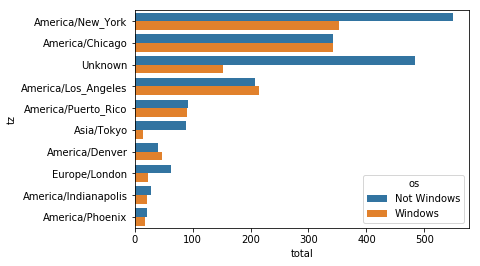

In [37]:
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [43]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
results

,tz,os,total,normed_total
0,America/New_York,Not Windows,550.0,0.609081
1,America/New_York,Windows,353.0,0.390919
2,America/Chicago,Not Windows,343.0,0.500000
3,America/Chicago,Windows,343.0,0.500000
4,Unknown,Not Windows,484.0,0.761006
5,Unknown,Windows,152.0,0.238994
6,America/Los_Angeles,Not Windows,207.0,0.491686
7,America/Los_Angeles,Windows,214.0,0.508314
8,America/Puerto_Rico,Not Windows,93.0,0.505435
9,America/Puerto_Rico,Windows,91.0,0.494565


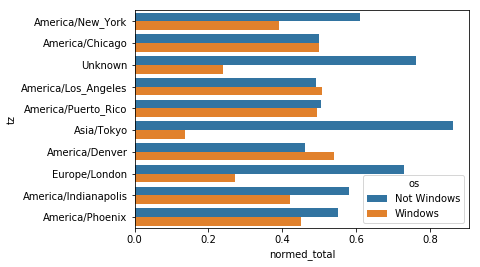

In [40]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)

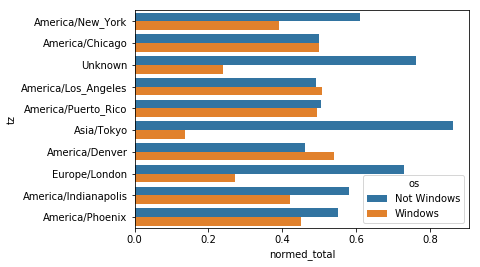

In [48]:
# more efficient
count_subset['normed_total'] = count_subset.total / count_subset.groupby('tz').total.transform('sum')
sns.barplot(x='normed_total', y='tz', hue='os',  data=count_subset)